# Exploratory Analyses

1. Hypothesis: Temporal proximity will be associated with more resharing.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid",{'axes.spines.left' : False,
                           'axes.spines.right': False,
                           'axes.spines.top': False,
                           'grid.linestyle': ':'})
sns.set_context("poster")

STUDY_ID ="60b37265a9f60881975de69e"


In [2]:
participants = pd.read_csv(f"../data/processed/{STUDY_ID}-participants.csv")
posts = pd.read_csv(f"../data/processed/{STUDY_ID}-rumour-results.csv")
reshare_rates = pd.read_csv(f"../data/processed/{STUDY_ID}-reshare_rates.csv")
post_study = pd.read_csv(f"../data/processed/{STUDY_ID}-post-study-responses.csv")
treat = posts[["user_id","condition"]].set_index("user_id")["condition"].to_dict()
participants["condition"] = participants["user_id"].map(treat)
print("Shape: {}x{}".format(*participants.shape))

Shape: 107x48


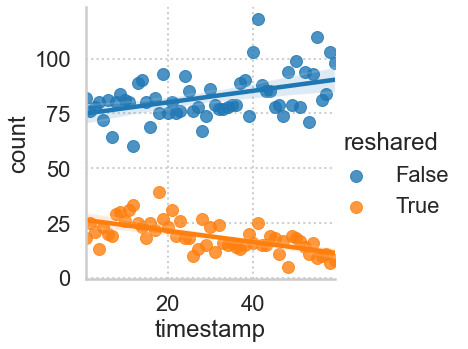

In [3]:
seconds_taken = pd.DataFrame(posts.groupby(["timestamp",'reshared']).size()).reset_index()
seconds_taken = seconds_taken.rename({0:'count'},axis=1)

g = sns.lmplot(x="timestamp", 
               y="count",
               hue="reshared",
               data=seconds_taken)

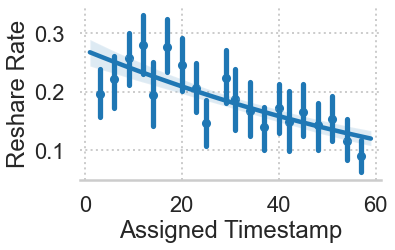

In [25]:
g = sns.regplot(x="timestamp",
                y="reshared", 
                data=posts,
                x_estimator=np.mean,
                x_bins=20,
                logistic=True, 
                n_boot=500)
sns.despine(left=True)
g.set(xlim=(-1,61),ylabel="Reshare Rate",xlabel="Assigned Timestamp")
plt.tight_layout()
g.figure.savefig("../figures/descriptive_analysis/reshare_rate_timestamp.pdf")